# **K-Means SPOTIFY**

Dataset previamente filtrado, usado para proyecto de PySpark, posteriormente se realizaron taréas relacionadas al dataset utilizado para el modelo.

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df = pd.read_csv('C:/Dropbox/CursoSpark/df_spotify.csv', sep= ',')

In [161]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'artists', 'album_name',
       'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'genero'],
      dtype='object')

In [162]:
df.shape

(114000, 23)

In [163]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [164]:
df = df.drop('track_id', axis=1)

In [165]:
df['explicit'] = [0 if x == False
                  else 1 for x in df['explicit']]

In [166]:
df.head(5)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


In [167]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [168]:
df[df['track_name'] == 'Presión']

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,genero
2638,Callejeros,Presión,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,alt-rock,2
3982,Callejeros,Presión,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,alternative,3


In [169]:
#Lo que si hacemos es borrar pistas identicas
df = df.drop_duplicates(subset='track_name', keep= 'last')

In [170]:
df.shape

(73609, 20)

In [171]:
df_modelo = df.drop(['artists', 'album_name', 'track_genre'], axis=1)

In [172]:
df_modelo.dtypes

track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
dtype: object

In [173]:
df_modelo.tail(5)

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
113995,Sleep My Little Boy,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,113
113996,Water Into Light,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,113
113997,Miss Perfumado,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,113
113998,Friends,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,113
113999,Barbincor,22,241826,0,0.526,0.487,1,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,113


In [174]:
df_modelo[df_modelo['tempo'] == 0.0]

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
4379,The End of Childhood (feat. Jack Liebeck),55,73266,0,0.0,0.04450,0,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,4
4664,Ferme Les Yeux,53,68493,0,0.0,0.03230,2,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,4
45670,Campomoro,22,148711,0,0.0,0.00108,0,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,45
45720,Ritornello,23,102000,0,0.0,0.00129,7,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,45
45729,Amager,22,133624,0,0.0,0.00400,0,-28.326,1,0.0,0.970000,0.959,0.1090,0.0,0.0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101988,Tin White Noise,32,182050,0,0.0,0.00002,1,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,101
101993,Rain: Natural Recording,32,84219,0,0.0,0.02540,8,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,101
113428,Aire de verano,27,128000,0,0.0,0.18800,8,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,113
113688,Ruido Rosa Puro - Una Hora Versión,24,3601693,0,0.0,0.00002,1,-11.165,1,0.0,0.186000,1.000,0.3620,0.0,0.0,0,113


***En el anterior modelo quitamos de los datos a las pistas con tempo 0.0, pero fue un error, esas pistas por lo general son pistas para estudiar, meditar, y demas.***

In [175]:
df_modelo.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,73609.000000,7.360900e+04,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000,73609.000000
mean,34.435436,2.322553e+05,0.085601,0.558254,0.637039,5.281555,-8.613890,0.632803,0.090155,0.330427,0.184829,0.222949,0.466765,122.111466,3.895325,60.429390
std,19.079890,1.192616e+05,0.279776,0.178535,0.258556,3.558663,5.329225,0.482044,0.118614,0.339479,0.332044,0.201656,0.264258,30.150257,0.460753,33.227183
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738580e+05,0.000000,0.445000,0.458000,2.000000,-10.466000,0.000000,0.036200,0.016000,0.000000,0.098700,0.244000,99.135000,4.000000,33.000000
50%,34.000000,2.157360e+05,0.000000,0.573000,0.680000,5.000000,-7.271000,1.000000,0.049400,0.193000,0.000084,0.134000,0.454000,122.043000,4.000000,61.000000
75%,48.000000,2.687460e+05,0.000000,0.690000,0.858000,8.000000,-5.151000,1.000000,0.088400,0.629000,0.151000,0.288000,0.681000,140.135000,4.000000,91.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [176]:
df_modelo = df_modelo.reset_index()

In [177]:
df_modelo = df_modelo.drop(columns=['index'], axis=1)

In [178]:
df_modelo

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,To Begin Again,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,0
1,Hold On - Remix,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.3870,120.004,4,0
2,All I Want For Christmas Is A Real Good Tan,0,234186,0,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.5640,202.019,4,0
3,The Haves,0,306794,0,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.3260,151.832,4,0
4,So Far Away - Acoustic,52,171543,0,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.4070,149.020,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73604,Sleep My Little Boy,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5,113
73605,Water Into Light,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,113
73606,Miss Perfumado,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,113
73607,Friends,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4,113


## ANÁLISIS UNIVARIADO

POPULARIDAD

In [179]:
popularidad = df_modelo['popularity']

In [180]:
popularidad

0        57
1        56
2         0
3         0
4        52
         ..
73604    21
73605    22
73606    22
73607    41
73608    22
Name: popularity, Length: 73609, dtype: int64

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\677600406.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popularidad, shade=True)


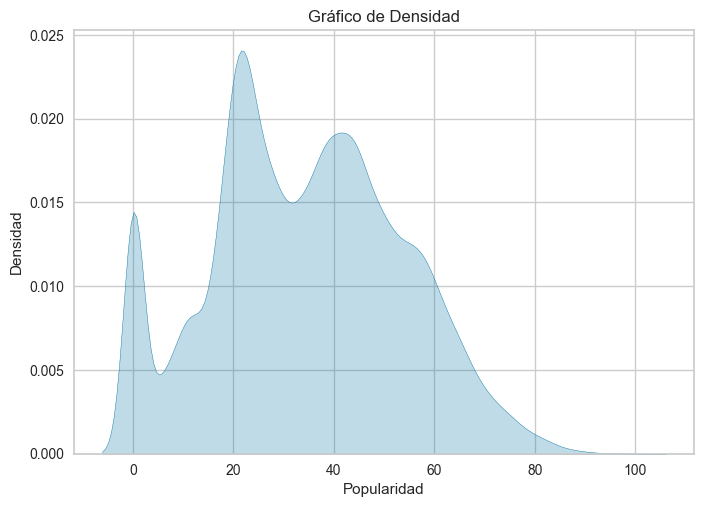

In [181]:
sns.kdeplot(popularidad, shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Popularidad')
plt.ylabel('Densidad')
plt.show()

In [182]:
popularidad.describe()

count    73609.000000
mean        34.435436
std         19.079890
min          0.000000
25%         21.000000
50%         34.000000
75%         48.000000
max        100.000000
Name: popularity, dtype: float64

In [183]:
popularidad_values = popularidad.values

In [184]:
popularidad_values = list(popularidad_values)

In [185]:
suma = 0
for i in popularidad_values:
    suma +=i

promedio = (suma / 114000)

In [186]:
promedio

22.234719298245615

In [187]:
ranges = ['0', '50', '100']

In [188]:
count_popularidad = [popularidad_values.count(0), popularidad_values.count(50), popularidad_values.count(100)]

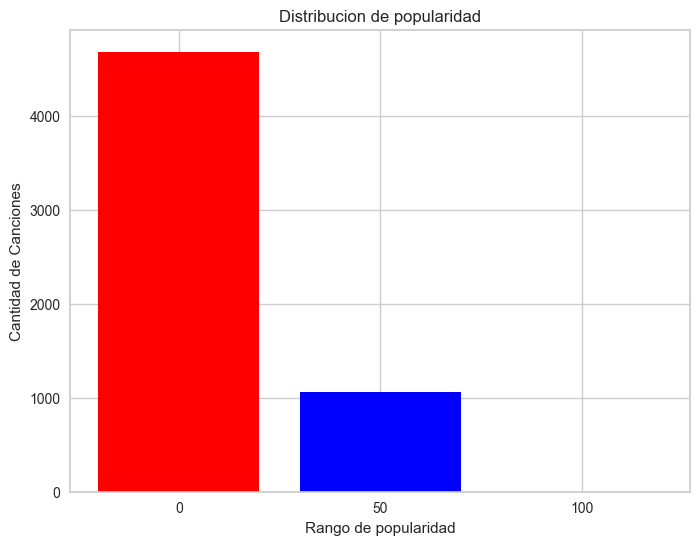

In [189]:
plt.figure(figsize=(8,6))
plt.bar(ranges, count_popularidad, color= ['red', 'blue', 'green'])
plt.xlabel('Rango de popularidad')
plt.ylabel('Cantidad de Canciones')
plt.title('Distribucion de popularidad')
plt.show()

***Lo que podemos saber de este análisis sobre la popularidad es son más las pistas poco populares que más populares. Quizas se deba a la continua actualización y lanzamientos de hits nuevos.***

DURATION-MS

Duracion de una pista en milisegundos

In [190]:
duracion_ms = df_modelo['duration_ms']

In [191]:
duracion_ms.describe()

count    7.360900e+04
mean     2.322553e+05
std      1.192616e+05
min      0.000000e+00
25%      1.738580e+05
50%      2.157360e+05
75%      2.687460e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

In [192]:
duracion_ms.unique()

array([210826, 188133, 234186, ..., 250629, 312566, 271466], dtype=int64)

In [193]:
duracion_ms_values = list(duracion_ms.values)

In [194]:
duracion_ms_values

[210826,
 188133,
 234186,
 306794,
 171543,
 234473,
 216000,
 178600,
 254400,
 222146,
 250266,
 222351,
 247840,
 164500,
 138495,
 198626,
 349920,
 204973,
 210375,
 131000,
 218531,
 212386,
 225165,
 240165,
 154600,
 158960,
 277000,
 215173,
 296862,
 339196,
 296843,
 151773,
 192260,
 198855,
 191889,
 221425,
 255047,
 208793,
 214552,
 264280,
 289041,
 322080,
 111734,
 210760,
 174546,
 234330,
 149000,
 157466,
 233728,
 245186,
 219613,
 252466,
 246613,
 198786,
 226640,
 203869,
 261640,
 211933,
 165133,
 221170,
 192972,
 278640,
 212864,
 219466,
 148400,
 244800,
 270840,
 279826,
 214738,
 188494,
 210354,
 205666,
 240952,
 199594,
 231965,
 231605,
 306200,
 201933,
 158013,
 296386,
 181360,
 149160,
 176509,
 179886,
 108346,
 160768,
 241132,
 257173,
 159012,
 178546,
 268800,
 194667,
 201440,
 204998,
 171800,
 211624,
 196240,
 199459,
 169253,
 146066,
 331984,
 199786,
 94053,
 231813,
 216773,
 145771,
 279260,
 162963,
 166189,
 165067,
 208571,
 1

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\3528134794.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(duracion_ms, shade=True)


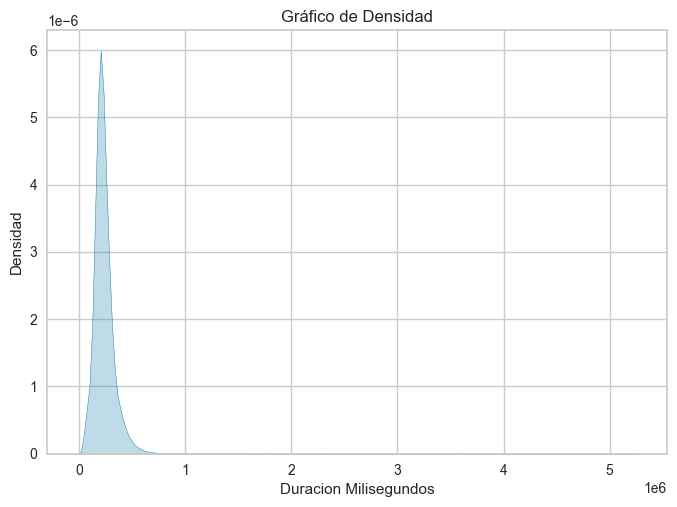

In [195]:
#GRAFICO SIN NORMALIZACION, PODEMOS OBSERVAR QUE EL GRAFICO NO NOS DICE MUCHO.
sns.kdeplot(duracion_ms, shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Duracion Milisegundos')
plt.ylabel('Densidad')
plt.show()

In [196]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [197]:
min_max_scaler = MinMaxScaler()
duration_ms_normalized = min_max_scaler.fit_transform(np.array(duracion_ms).reshape(-1, 1))

# Estandarización
standard_scaler = StandardScaler()
duration_ms_standardized = standard_scaler.fit_transform(np.array(duracion_ms).reshape(-1, 1))

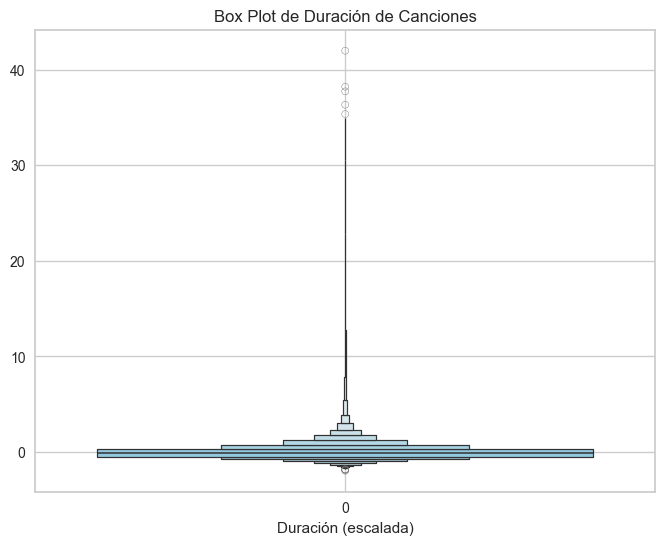

In [198]:
#HAY QUE ANALIZAR LAS CANCIONES CON POCA DURACION O CON DURACION 0.
plt.figure(figsize=(8, 6))
sns.boxenplot(duration_ms_standardized, color='skyblue')
plt.xlabel('Duración (escalada)')
plt.title('Box Plot de Duración de Canciones')
plt.grid(True)
plt.show()

In [199]:
def ms_a_minutos(duracion_ms):
    minutos = []
    for ms in duracion_ms:
        minutos.append(ms/60000)
    return minutos


In [200]:
minutos = ms_a_minutos(duracion_ms)

In [201]:
minutos

[3.5137666666666667,
 3.13555,
 3.9031,
 5.1132333333333335,
 2.85905,
 3.9078833333333334,
 3.6,
 2.9766666666666666,
 4.24,
 3.7024333333333335,
 4.1711,
 3.70585,
 4.1306666666666665,
 2.7416666666666667,
 2.30825,
 3.310433333333333,
 5.832,
 3.4162166666666667,
 3.50625,
 2.183333333333333,
 3.6421833333333336,
 3.5397666666666665,
 3.75275,
 4.00275,
 2.5766666666666667,
 2.6493333333333333,
 4.616666666666666,
 3.5862166666666666,
 4.9477,
 5.653266666666667,
 4.947383333333334,
 2.52955,
 3.2043333333333335,
 3.31425,
 3.19815,
 3.6904166666666667,
 4.250783333333334,
 3.4798833333333334,
 3.5758666666666667,
 4.4046666666666665,
 4.81735,
 5.368,
 1.8622333333333334,
 3.5126666666666666,
 2.9091,
 3.9055,
 2.4833333333333334,
 2.624433333333333,
 3.8954666666666666,
 4.086433333333333,
 3.6602166666666665,
 4.207766666666667,
 4.110216666666667,
 3.3131,
 3.7773333333333334,
 3.3978166666666665,
 4.360666666666667,
 3.532216666666667,
 2.7522166666666665,
 3.686166666666667,
 

In [202]:
serie_minutos = pd.Series(minutos)

In [203]:
serie_minutos.sort_values(ascending=True)

39167     0.000000
34996     0.143100
35430     0.223100
35397     0.263333
9477      0.290883
           ...    
7319     74.125333
44037    76.064950
13651    78.838367
5741     79.817100
43842    87.288250
Length: 73609, dtype: float64

In [204]:
df_modelo[df_modelo['duration_ms'] == 8586].T

,34996
track_name,The Exorsism Begins...
popularity,0
duration_ms,8586
explicit,0
danceability,0.0
energy,0.04
key,8
loudness,-29.714
mode,0
speechiness,0.0


In [205]:
df_modelo['duration_ms'].sort_values(ascending=True)

39167          0
34996       8586
35430      13386
35397      15800
9477       17453
          ...   
7319     4447520
44037    4563897
13651    4730302
5741     4789026
43842    5237295
Name: duration_ms, Length: 73609, dtype: int64

In [206]:
df_modelo = df_modelo[df_modelo['duration_ms'] != 0]

In [207]:
df_modelo['duration_ms'].sort_values(ascending=True)

34996       8586
35430      13386
35397      15800
9477       17453
21646      17826
          ...   
7319     4447520
44037    4563897
13651    4730302
5741     4789026
43842    5237295
Name: duration_ms, Length: 73608, dtype: int64

***La mayor cantidad de pistas duran menos, se entiende segun la documentacion que son pistas musicales, aunque los valores "atipicos" serian los podcasts, que tienen duracion de mas de dos horas.***

EXPLICIT

Estamos hablando si una pista es de condenido explicito o no. 0 y 1.

In [208]:
df_modelo['explicit'].describe()

count    73608.000000
mean         0.085602
std          0.279778
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: explicit, dtype: float64

In [209]:
df_modelo['explicit'].unique()

array([0, 1], dtype=int64)

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\1876329400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts, palette=colors)


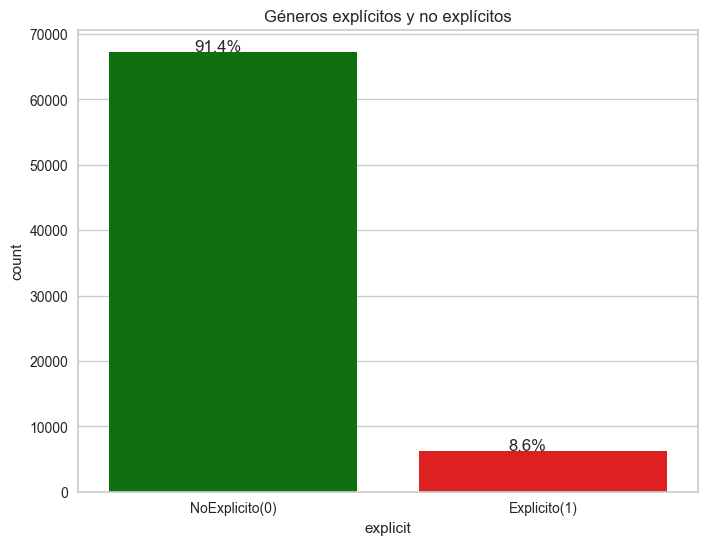

In [210]:
explicito = df_modelo['explicit']
counts = explicito.value_counts()
colors = ['green', 'red']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=counts.index, y=counts, palette=colors)
plt.xticks(ticks=[0, 1], labels=["NoExplicito(0)", "Explicito(1)"])
plt.title("Géneros explícitos y no explícitos")

# Agregar porcentajes a cada barra
total = len(explicito)
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / total)
    x = i.get_x() + i.get_width() / 2 - 0.05
    y = i.get_height() + 50
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [211]:
counts

explicit
0    67307
1     6301
Name: count, dtype: int64

***Son pocas las pistas que tienen contenido explicito en comparacion a las que no lo tienen***

DANCEABILITY

La bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 es el más bailable.

In [212]:
df_modelo['danceability'].describe()

count    73608.000000
mean         0.558255
std          0.178536
min          0.000000
25%          0.445000
50%          0.573000
75%          0.690000
max          0.985000
Name: danceability, dtype: float64

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\3700429655.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_modelo['danceability'], shade=True)


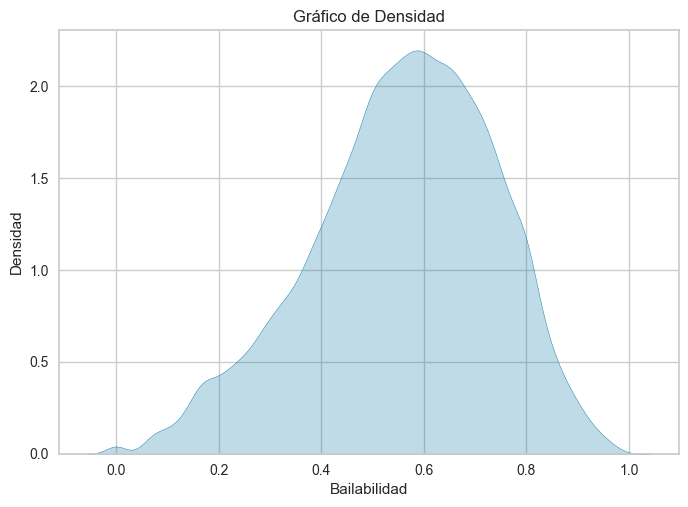

In [213]:
sns.kdeplot(df_modelo['danceability'], shade=True)
plt.title('Gráfico de Densidad')
plt.xlabel('Bailabilidad')
plt.ylabel('Densidad')
plt.show()

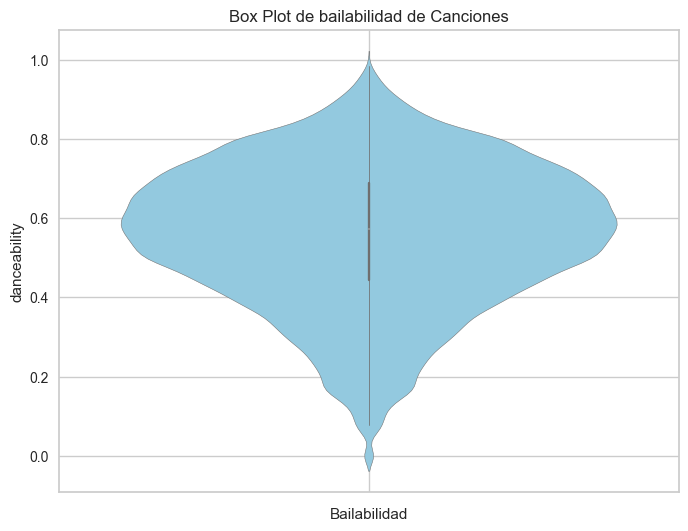

In [214]:
plt.figure(figsize=(8, 6))
sns.violinplot(df['danceability'], color='skyblue')
plt.xlabel('Bailabilidad')
plt.title('Box Plot de bailabilidad de Canciones')
plt.grid(True)
plt.show()

***Hay una distribucion bastante estable, aunque el promedio se encuentra dentro de las pistas que son mas bailables por asi decirlo, quizas el termino adecuado seria mas animado.***

ENERGY

La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Normalmente, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach obtiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, velocidad de inicio y entropía general.

In [215]:
df_modelo['energy'].describe()

count    73608.000000
mean         0.637040
std          0.258557
min          0.000000
25%          0.458000
50%          0.680000
75%          0.858000
max          1.000000
Name: energy, dtype: float64

<Axes: xlabel='energy', ylabel='Count'>

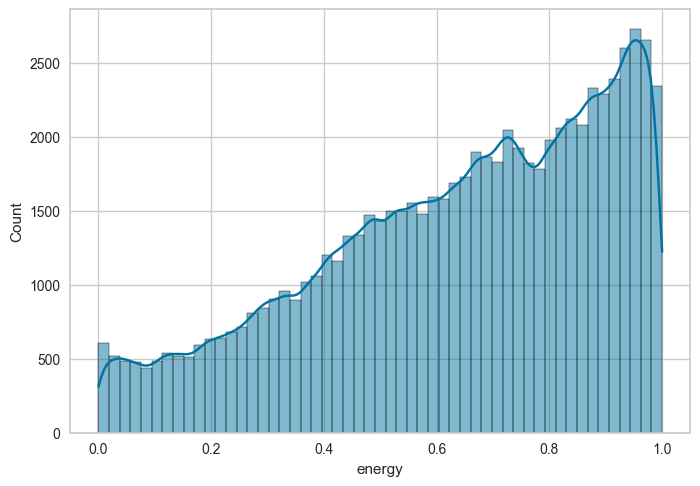

In [216]:
sns.histplot(df_modelo['energy'], kde = True,
             kde_kws = {'bw_adjust': 0.5})

In [217]:
df_modelo[df_modelo['energy'] == 0.0]

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
63109,Pure White Noise - Loopable with No Fade,35,73886,0,0.0,0.0,0,-8.437,0,0.0,0.0,0.0,0.0,0.0,0.0,0,101


***La distribucion de la muestra de pistas tienen una tendencia a ser pistas mas energicas o ruidosas.***

KEY

La clave en la que se encuentra la pista. Los números enteros se asignan a los tonos utilizando la notación estándar de clase de tono . Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, etc. Si no se detectó ninguna clave, el valor es -1.

In [218]:
df_modelo['key'].describe()

count    73608.000000
mean         5.281532
std          3.558682
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64

In [219]:
df_modelo['key'].unique()

array([ 0,  2,  6,  7,  4,  3,  5, 10,  8,  9, 11,  1], dtype=int64)

In [220]:
grupo0 = df_modelo['key'].value_counts(0)

In [221]:
grupo0.sort_values(ascending=False)

key
7     8797
0     8464
2     7786
9     7484
1     6994
4     5967
5     5894
11    5827
6     4953
10    4804
8     4431
3     2207
Name: count, dtype: int64

In [222]:
grupo0.values

array([8797, 8464, 7786, 7484, 6994, 5967, 5894, 5827, 4953, 4804, 4431,
       2207], dtype=int64)

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\3252337732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x = grupo0.keys(), y = grupo0.values, linewidth = 0.5, palette = "pastel", dodge = True,)


<Axes: xlabel='key'>

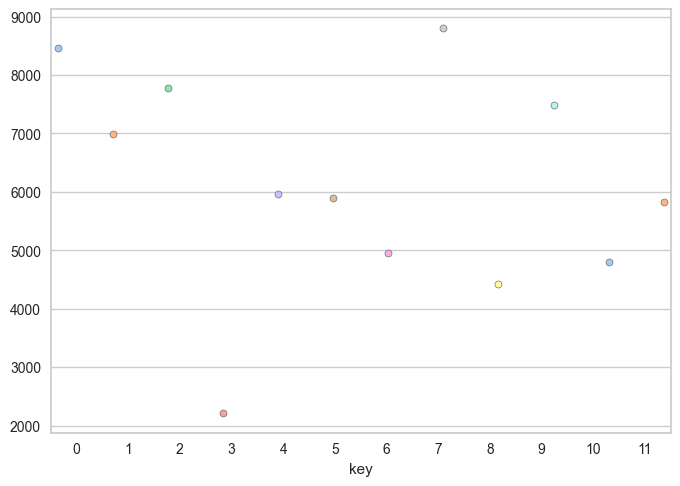

In [223]:
sns.swarmplot(x = grupo0.keys(), y = grupo0.values, linewidth = 0.5, palette = "pastel", dodge = True,)

<Axes: xlabel='key', ylabel='Count'>

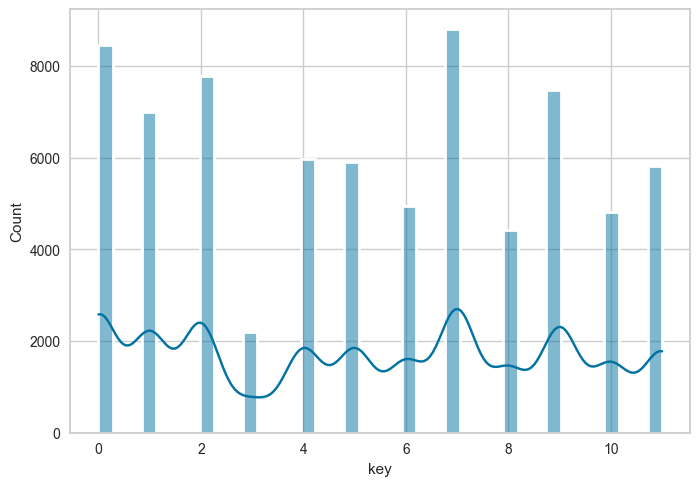

In [224]:
#Reemplazamos este grafico por el siguiente..
sns.histplot(x = df_modelo['key'],
             edgecolor = "white",
             linewidth = 2, kde=True)

***No entiendo bien esta variable, pero parece, según la descripción, una variable que sirve para agrupar por por clave. Veremos si funciona dentro de nuestro modelo.***

LOUDNESS

El volumen general de una pista en decibeles (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

In [225]:
df_modelo['loudness'].describe()

count    73608.000000
mean        -8.613879
std          5.329260
min        -49.531000
25%        -10.466000
50%         -7.271000
75%         -5.151000
max          4.532000
Name: loudness, dtype: float64

<Axes: xlabel='loudness', ylabel='Count'>

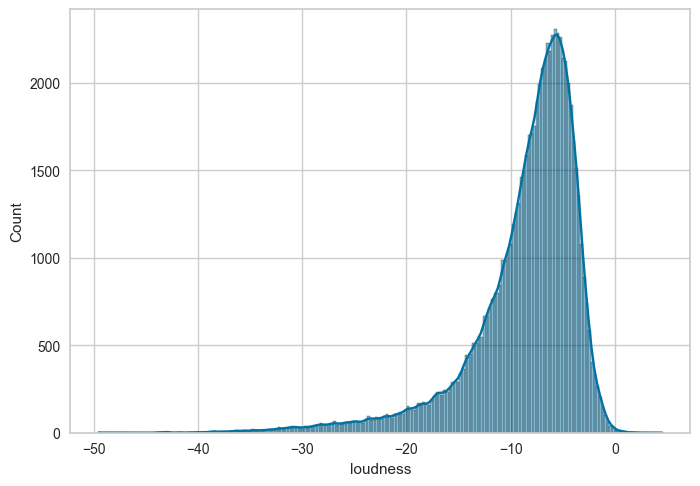

In [226]:
x = df_modelo['loudness']
df_loudness = {'loudness': x}

# Histograma
sns.histplot(x = x, kde = True,
             kde_kws = {'bw_adjust': 0.5})

***Las pistas que tienen menor volumen son pistas relacionadas a la meditacion y demas.***

MODE

Modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El mayor está representado por 1 y el menor es 0.

In [227]:
df_modelo['mode'].describe()

count    73608.000000
mean         0.632812
std          0.482042
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64

C:\Users\nicos\AppData\Local\Temp\ipykernel_14848\150667354.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= counts1.index, y=counts1, palette=colors)


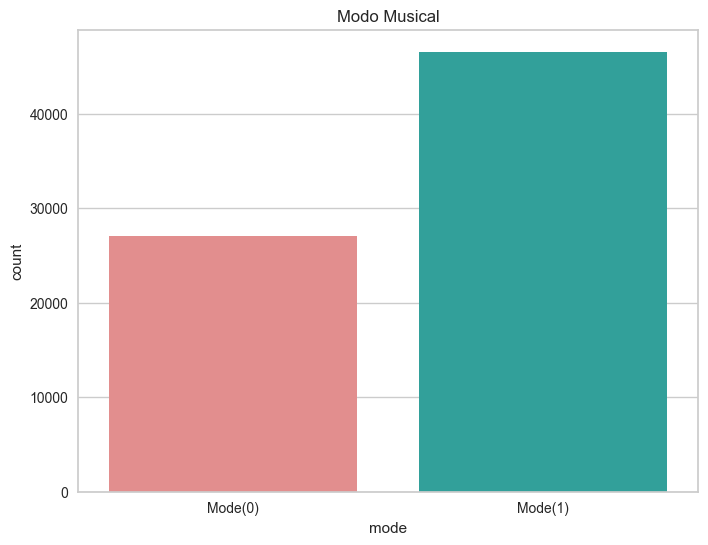

In [228]:
mode = df_modelo['mode']
counts1 = mode.value_counts()
colors = ["lightcoral", "lightseagreen"]

plt.figure(figsize= (8,6))
sns.barplot(x= counts1.index, y=counts1, palette=colors)
plt.xticks(ticks= [0, 1], labels=["Mode(0)", "Mode(1)"])
plt.title("Modo Musical")
plt.show()

In [229]:
counts1

mode
1    46580
0    27028
Name: count, dtype: int64

***El mayor porcentaje de pistas tiene mas contenido melodico.***

SPEECHINESS

Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores inferiores a 0,33 probablemente representen música y otras pistas que no sean de voz.

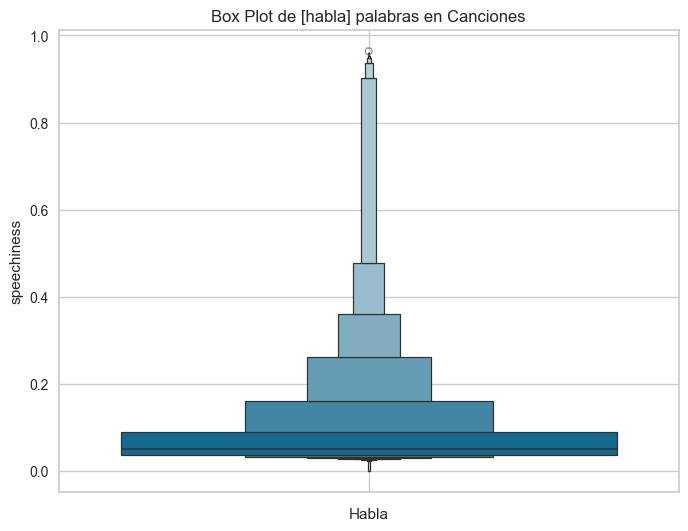

In [230]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['speechiness'])
plt.xlabel('Habla')
plt.title('Box Plot de [habla] palabras en Canciones')
plt.grid(True)
plt.show()

***Podemos encontrar un dato interesante y es que el mayor porcentaje de pistas no necesariamente tienen que tener voz de por medio, quizas una gran parte puedan ser pistas con menor cantidad de palabras en su contenido.***

ACOUSTICNESS

Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.

In [231]:
df_modelo['acousticness'].describe()

count    73608.000000
mean         0.330422
std          0.339478
min          0.000000
25%          0.016000
50%          0.193000
75%          0.629000
max          0.996000
Name: acousticness, dtype: float64

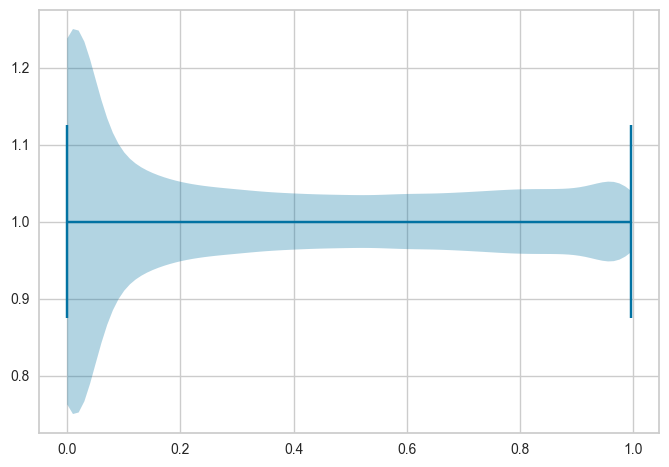

In [232]:
#Una variante de gráfico interesante para poder observar la distribucion.
fig, ax = plt.subplots()
ax.violinplot(df_modelo['acousticness'], vert = False)
plt.show()

***Gran parte de la muestra no es acustica***

INSTRUMENTALNESS

Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se tratan como instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1,0, mayor será la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0,5 pretenden representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0.

In [233]:
df_modelo['instrumentalness'].describe()

count    73608.000000
mean         0.184831
std          0.332046
min          0.000000
25%          0.000000
50%          0.000084
75%          0.151000
max          1.000000
Name: instrumentalness, dtype: float64

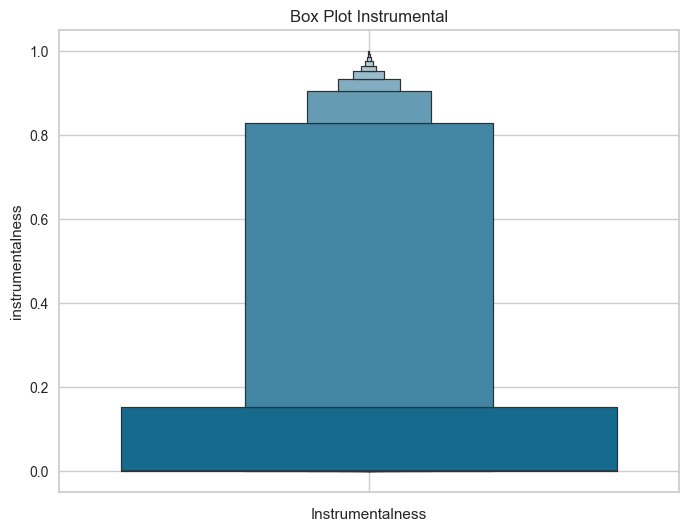

In [234]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['instrumentalness'])
plt.xlabel('Instrumentalness')
plt.title('Box Plot Instrumental')
plt.grid(True)
plt.show()

***Podemos ver un gran volumen de la muestra acercandose al valor 0, mientras mas se acerque a ese valor, hay mas probabilidad que estemos frente a una pista con mas contenido vocal que instrumental.***

LIVENESS

Detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se haya interpretado en vivo. Un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa.

In [235]:
df_modelo['liveness'].describe()

count    73608.000000
mean         0.222951
std          0.201657
min          0.000000
25%          0.098700
50%          0.134000
75%          0.288000
max          1.000000
Name: liveness, dtype: float64

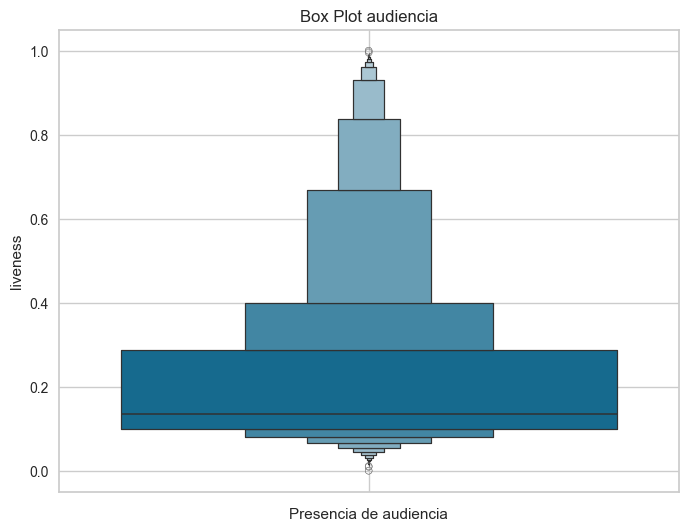

In [236]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df_modelo['liveness'])
plt.xlabel('Presencia de audiencia')
plt.title('Box Plot audiencia')
plt.grid(True)
plt.show()

***La mayor cantidad de pistas son las que no tienen audiencia de fondo, y pocas pistas son las que estan "activas" o grabadas con audiencia de fondo.***

VALENCE


Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes, deprimidas, enojadas).

In [237]:
df_modelo['valence'].describe()

count    73608.000000
mean         0.466762
std          0.264258
min          0.000000
25%          0.244000
50%          0.454000
75%          0.681000
max          0.995000
Name: valence, dtype: float64

<Axes: xlabel='valence', ylabel='Count'>

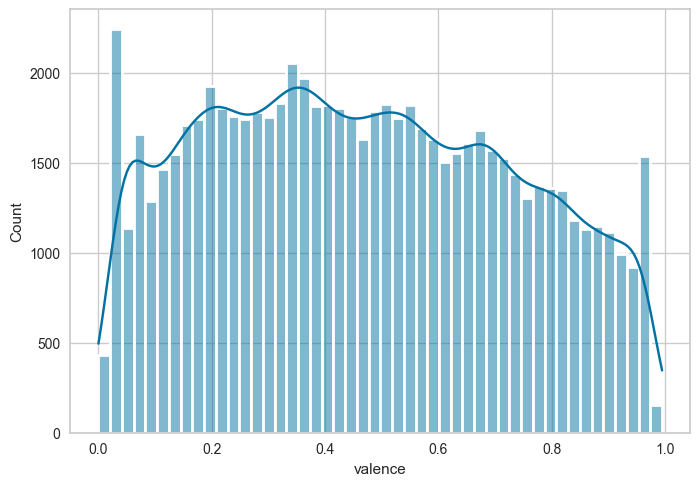

In [238]:
sns.histplot(x = df_modelo['valence'],
             edgecolor = "white",
             linewidth = 2, kde=True)

***Es la variable con distribucion mas uniforme que se encuentra en la fuente de datos, pero la pequeña tendecia cede ante las pistas que tienen un contenido deprimido, triste o enojado.***

TEMPO

El tempo general estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración promedio del tiempo.

In [239]:
df_modelo['tempo'].describe()

count    73608.000000
mean       122.111245
std         30.150402
min          0.000000
25%         99.134750
50%        122.043000
75%        140.135250
max        243.372000
Name: tempo, dtype: float64

In [240]:
df_modelo[df_modelo['tempo'] == 0.0]

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
1789,The End of Childhood (feat. Jack Liebeck),55,73266,0,0.0,0.04450,0,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,4
1951,Ferme Les Yeux,53,68493,0,0.0,0.03230,2,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,4
26395,Campomoro,22,148711,0,0.0,0.00108,0,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,45
26440,Ritornello,23,102000,0,0.0,0.00129,7,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,45
26449,Amager,22,133624,0,0.0,0.00400,0,-28.326,1,0.0,0.970000,0.959,0.1090,0.0,0.0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63509,Tin White Noise,32,182050,0,0.0,0.00002,1,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,101
63514,Rain: Natural Recording,32,84219,0,0.0,0.02540,8,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,101
73053,Aire de verano,27,128000,0,0.0,0.18800,8,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,113
73301,Ruido Rosa Puro - Una Hora Versión,24,3601693,0,0.0,0.00002,1,-11.165,1,0.0,0.186000,1.000,0.3620,0.0,0.0,0,113


<Axes: xlabel='tempo', ylabel='Count'>

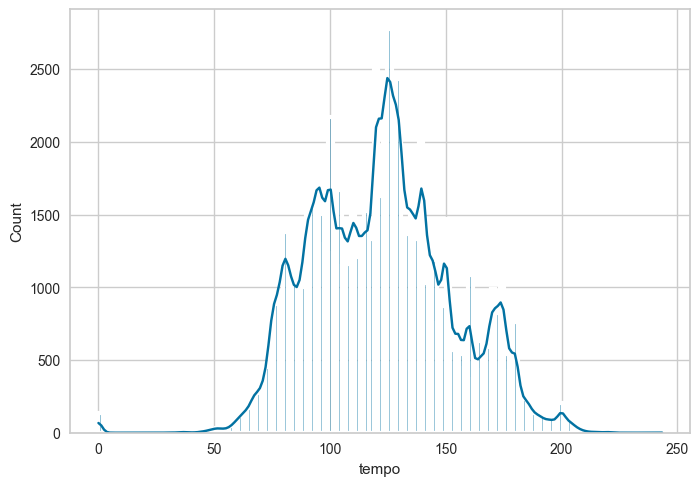

In [241]:
sns.histplot(x = df_modelo['tempo'],
             edgecolor = "white",
             linewidth = 3, kde=True, kde_kws = {'bw_adjust': 0.5})

***Es la segunda variable con una distribucion uniforme, con la diferencia que tenemos mas minimos y mas maximos dentro de la misma.***

TIME SIGNATURE

Un compás estimado. El tipo de compás (metro) es una convención de notación para especificar cuántos tiempos hay en cada compás (o compás). El tipo de compás varía de 3 a 7, lo que indica tipos de compás de "3/4" a "7/4".

In [242]:
df_modelo['time_signature'].describe()

count    73608.000000
mean         3.895324
std          0.460756
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64

In [243]:
df_modelo['time_signature'].unique()

array([4, 3, 1, 5, 0], dtype=int64)

In [244]:
time_signature = df_modelo['time_signature'].value_counts()

In [245]:
time_signature

time_signature
4    65072
3     6325
5     1349
1      719
0      143
Name: count, dtype: int64

In [246]:
time_signature_values = time_signature.values

In [247]:
time_signature_keys = time_signature.keys()

In [248]:
time_signature_keys

Index([4, 3, 5, 1, 0], dtype='int64', name='time_signature')

In [249]:
time_signature_values

array([65072,  6325,  1349,   719,   143], dtype=int64)

<Axes: xlabel='time_signature', ylabel='Count'>

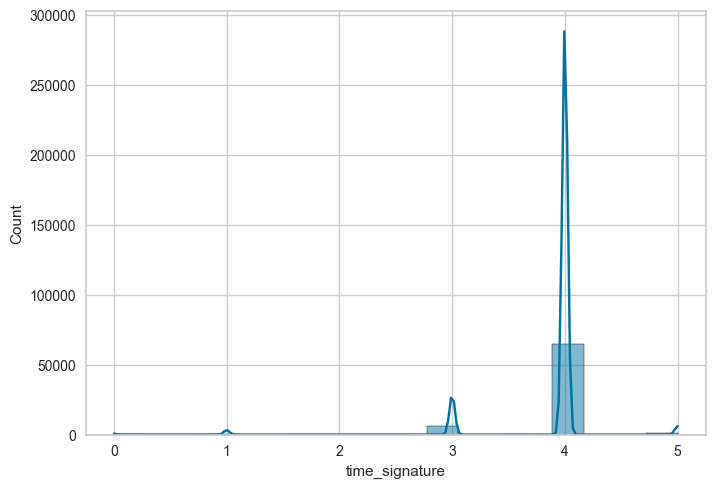

In [250]:
sns.histplot(df_modelo['time_signature'], kde = True,
             kde_kws = {'bw_adjust': 0.5})

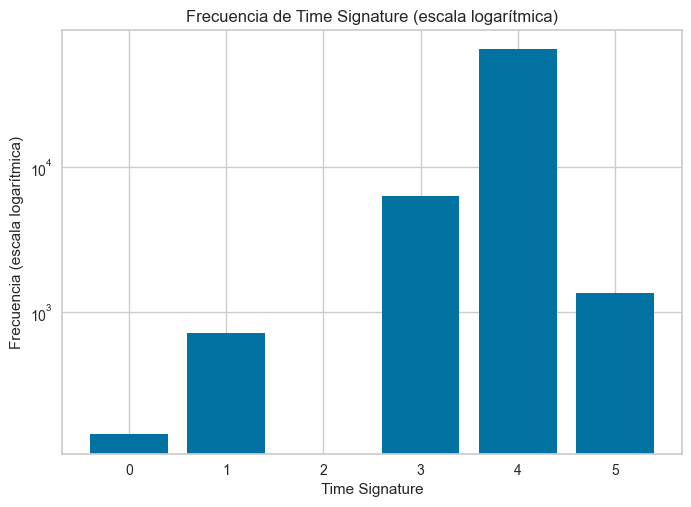

In [251]:
plt.bar(list(time_signature_keys), list(time_signature_values))
plt.yscale('log')
plt.xlabel('Time Signature')
plt.ylabel('Frecuencia (escala logarítmica)')
plt.title('Frecuencia de Time Signature (escala logarítmica)')
plt.show()

***Variable quizas mas conocida y apreciable para el campo musical, veremos si tiene relevancia en nuestro modelo.***

GENERO

Pasamos los genermos a musicales, en total 114 generos.

In [252]:
df_modelo['genero'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  57,  56,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  81,  80,  82,  83,  84,  86,  85,  87,  88,  89,  91,
        90,  92,  93,  94,  95,  96,  97,  98, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int64)

In [253]:
genero = df_modelo['genero'].value_counts()

In [254]:
genero

genero
105    977
112    959
97     958
18     944
42     928
      ... 
3      158
68     148
20     147
2      113
30      98
Name: count, Length: 113, dtype: int64

In [255]:
genero_keys = genero.keys()
genero_values = genero.values

***En el anterior análisis cada género musical tenia casi la misma cantidad de pistas, en este, la proporción ha cambiado.***

## ANALISIS BIVARIADO Y MULTIVARIADO

In [256]:
df_modelo.columns

Index(['track_name', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')

<Axes: >

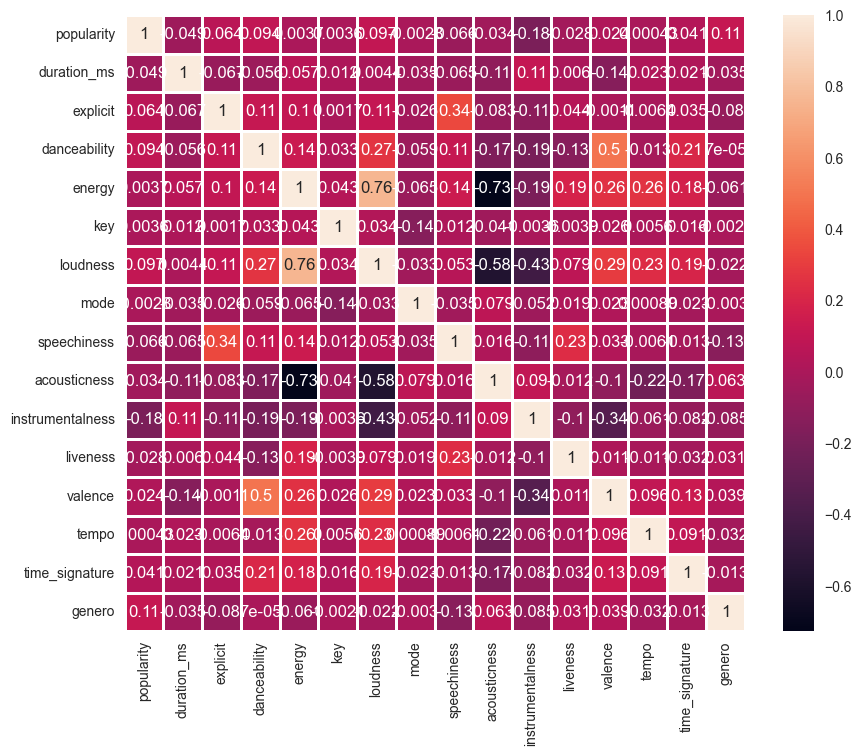

In [257]:
corr = df_modelo.drop('track_name', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot= True, linewidths=1)

In [258]:
df_modelo2 = df_modelo.drop('track_name', axis=1)

VARIABLES PARA ANALISIS BIVARIADO:

- LOUDNESS & ENERGY
- VALENCE & DANCEABILITY
- EXPLICIT & SPEACHINESS
- DANCEABILITY & LOUDNESS

ENERGY & LOUDNESS

In [259]:
print(df_modelo2.columns)
print(df_modelo2.dtypes)

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
dtype: object


In [260]:
df_modelo2['loudness']

0        -9.734
1        -6.084
2        -8.192
3        -5.291
4        -9.389
          ...  
73604   -16.393
73605   -18.318
73606   -10.895
73607   -10.889
73608   -10.204
Name: loudness, Length: 73608, dtype: float64

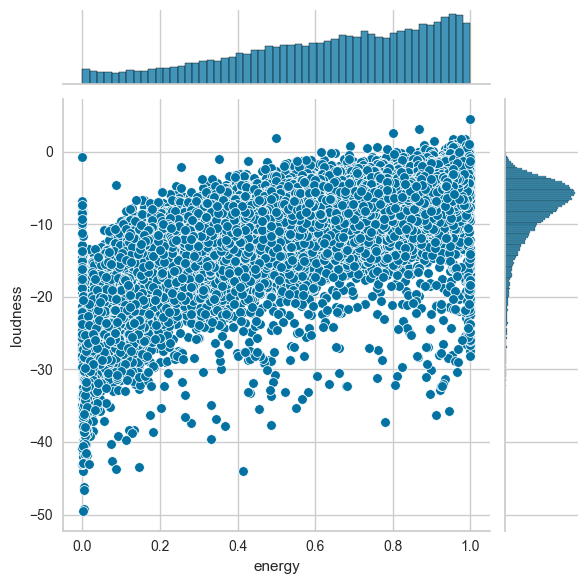

In [261]:
sns.jointplot(x='energy',y='loudness',data=df_modelo2,kind='scatter')

***Entre la relacion de energia y volumen, podemos ver que las pistas con mas volumen son las mas energicas, y con menos volumen, las mas tristes de meditacion o relajantes. VOLUMEN BAJO = - ENERGIA ; VOLUMEN ALTO = + ENERGIA***

VALENCE & DANCEABILITY

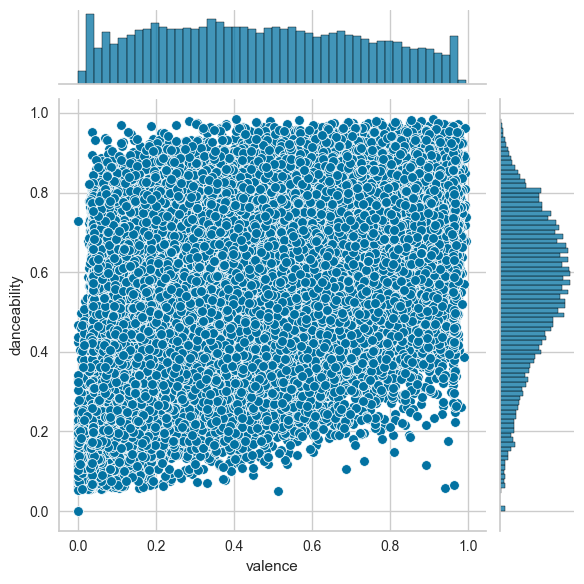

In [262]:
sns.jointplot(x='valence',y='danceability',data=df_modelo2,kind='scatter')

***Podemos ver que mientras mas positividad tiene una pista, mas bailable es, de lo contrario cuando menos positiva es, menos bailable es. Si bien es algo obvio, pero interpreta una tendencia para que las personas elijan pistas mas positivas por ende los artistan tiendan tambien a componer una gran variedad de canciones alegres o positivas. Sin embargo hay una gran diversidad de generos y pistas con gran variedad de positividad y bailabilidad.***

EXPLICIT & SPEACHENESS

<Axes: xlabel='explicit', ylabel='speechiness'>

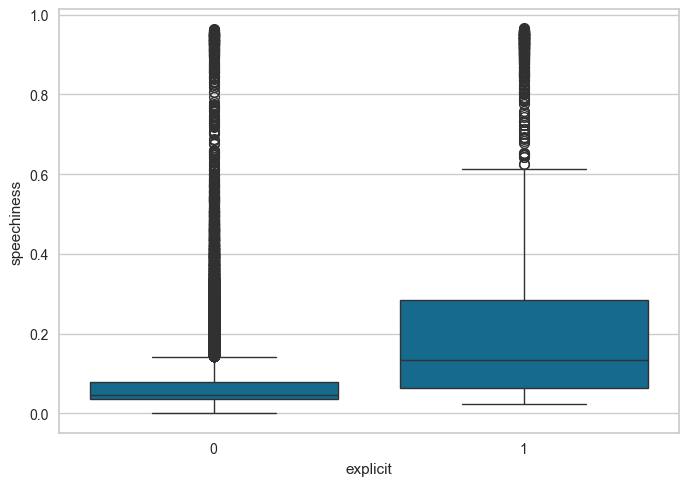

In [263]:
sns.boxplot(x='explicit',y='speechiness',data=df_modelo2)

***Finalmente podemos ver que las canciones mas habladas tienden a ser las que tienen mas contenido explicito, mientras que las canciones con menos palabras, son las menos explicitas. Será una tendendia a consumir mas cancionex explicitas?***

DANCEABILITY & LOUDNESS

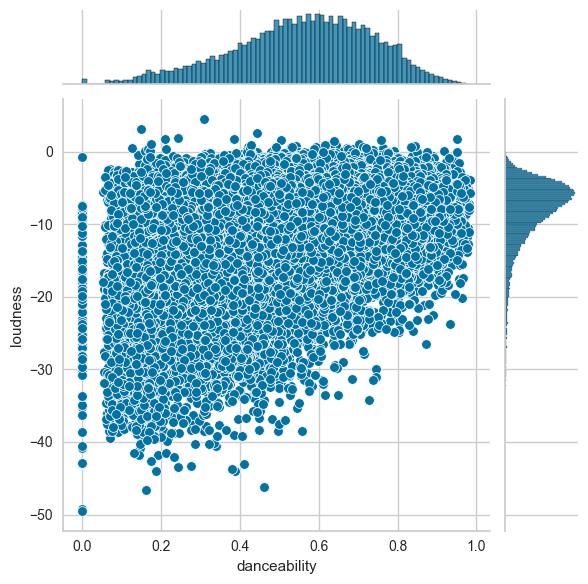

In [264]:
sns.jointplot(x='danceability',y='loudness',data=df_modelo2,kind='scatter')

***La tendencia entre estas dos variables se puede ver de manera facil, entendemos que mientras menos sonido tiene una pista, menos bailable es, de por si las pistas que tienen un tono y volumen mas fuerte, son las mas elegidas para bailar.***

VARIABLES DE ANALISIS BIVARIADO DE INTERES PERSONAL:
- energy & valence
- energy & tempo
- liveness & popularity

ENERGY & VALENCE

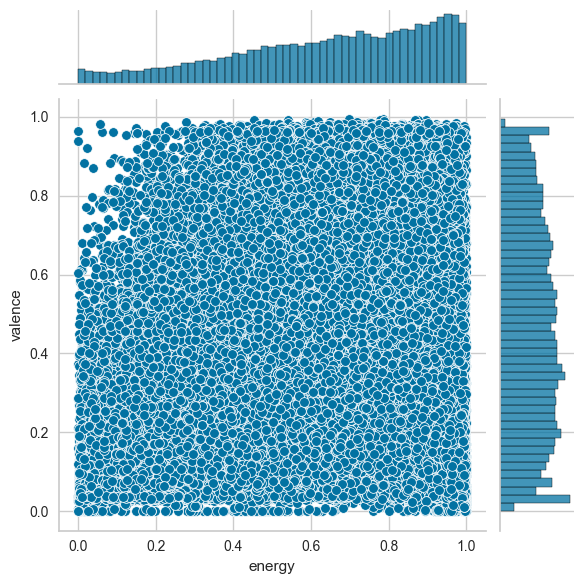

In [265]:
sns.jointplot(x='energy',y='valence',data=df_modelo2,kind='scatter')

***Por una cuestion personal queria ver esta interpretacion grafica, entre la energia y la positividad, la diferencia se ve entre en la esquina superior izquierda y derecha, mientras mas energica es una cancion, mas positiva es. AUNQUE... energy tambien puede hacer referencia a una pista de heavy o death methal, que si bien son muy energicas pero por lo general no transmiten mucha positividad. Asi como muchas otras pistas. Por eso aunque podemos ver esa diferencia, en el centro econtramos una gran cantidad de pistas diversas, debido a la distribucion uniforme de generos.***

ENERGY & TEMPO

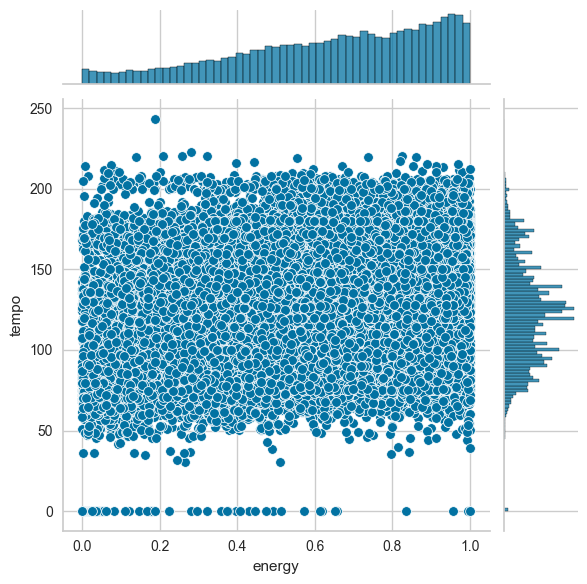

In [266]:
sns.jointplot(x='energy',y='tempo',data=df_modelo2,kind='scatter')

In [267]:
df_modelo2[df_modelo2['tempo'] == 0.0]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
1789,55,73266,0,0.0,0.04450,0,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,4
1951,53,68493,0,0.0,0.03230,2,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,4
26395,22,148711,0,0.0,0.00108,0,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,45
26440,23,102000,0,0.0,0.00129,7,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,45
26449,22,133624,0,0.0,0.00400,0,-28.326,1,0.0,0.970000,0.959,0.1090,0.0,0.0,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63509,32,182050,0,0.0,0.00002,1,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,101
63514,32,84219,0,0.0,0.02540,8,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,101
73053,27,128000,0,0.0,0.18800,8,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,113
73301,24,3601693,0,0.0,0.00002,1,-11.165,1,0.0,0.186000,1.000,0.3620,0.0,0.0,0,113


***Gracias a seguir las buenas practicas en el análisis, se pudo detectar que las pistas con un valor de tempo 0.0 son valores anómalos en la muestra. Lo podemos deducir ya que pueden existir algunas pistas con tempo 0.0, pero en la mayoria de nuestros casos, las pistas con tempo 0.0 corresponden a temas que son muy bailables o energicos.
Si bien existe la forma de poder calcular el tempo a travez de la duracion total de una pista, se necesita otra variable como la cantidad de pulsaciones, y como esa variable no la tenemos, para evitar datos erroneos que quizas arruinen nuestra muestra, los vamos a quitar del dataset para el modelo y vamos a correr todos los graficos nuevamente.***

***LUEGO DEL ANALISIS BIVARIADO HACER UN PCA SIN ELIMINAR COLUMNAS, SOLO REDUCIR LA DIMENSIONALIDAD Y PROBAR EL MODELO PARA RESPUES PODES TESTEARLO.***

In [268]:
df_modelo2.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero'],
      dtype='object')

Variables interesantes:
- popularity
- explicit
- danceability
- energy
- loudness
- speechiness
- valence


In [269]:
df_modelo2.head(4)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,0
1,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,0
2,0,234186,0,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,0
3,0,306794,0,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,0


In [270]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## K-Means Modelo

In [271]:
df_modelo2

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.1200,76.332,4,0
1,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.3870,120.004,4,0
2,0,234186,0,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.5640,202.019,4,0
3,0,306794,0,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.3260,151.832,4,0
4,52,171543,0,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.4070,149.020,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73604,21,384999,0,0.172,0.235,5,-16.393,1,0.0422,0.640,0.928000,0.0863,0.0339,125.995,5,113
73605,22,385000,0,0.174,0.117,0,-18.318,0,0.0401,0.994,0.976000,0.1050,0.0350,85.239,4,113
73606,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.867,0.000000,0.0839,0.7430,132.378,4,113
73607,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.381,0.000000,0.2700,0.4130,135.960,4,113


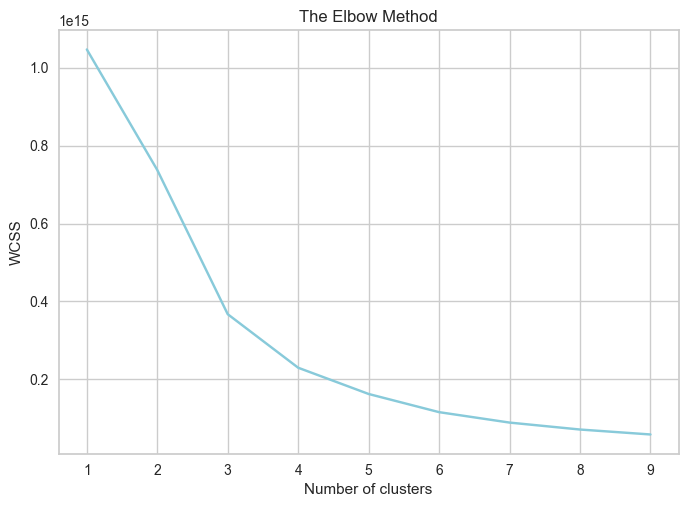

In [272]:
#METODO DE CODO
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_modelo2)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 10), wcss, "cx-")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

***En este grafico con 10 distancias obtservamos que la disminucion de las mismas entre clusters es a partir del numero 4.***

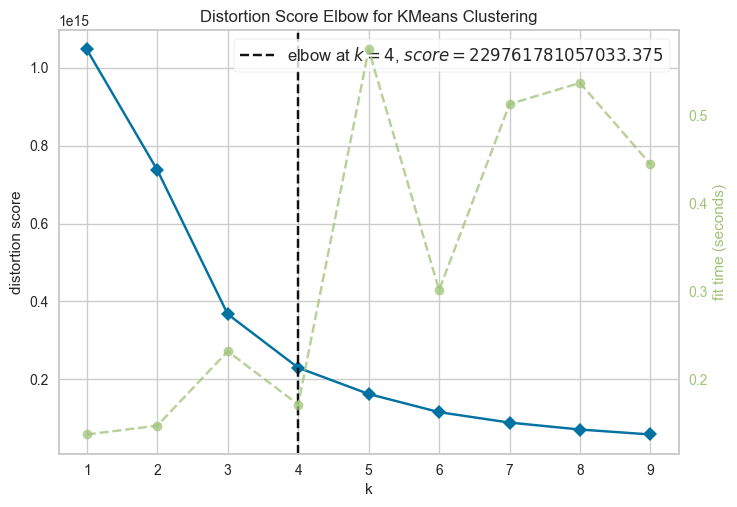

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [273]:
#METODO DE CODO CON KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Instanciar el modelo de clustering y el visualizador
km = KMeans(random_state=42, init = 'k-means++')

visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(df_modelo2)        # Ajustar los datos al visualizador
visualizer.show()   

***Sin embargo este grafico parece estar de acuerdo con que el valor de k es igual a 4 para un score de 229761781057033.375.***

In [322]:
# Creando Modelo con 4 Clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(df_modelo2)

In [275]:
y_kmeans.shape

(73608,)

In [276]:
y_kmeans

array([2, 2, 0, ..., 0, 0, 0])

In [277]:
df_modelo2.shape

(73608, 16)

In [326]:
X = df_modelo2.iloc[::].values

In [279]:
X.shape

(73608, 16)

***Probamos con 4 clusters***

***Desde el comienzo del análisis se podia observar que si bien habia distribuciones en funcion de variables unicas y dobles, lo que mas predominaba era la cantidad de pistas con distribuciones y caracteristicas similares. Por eso vemos en la agrupacion de Clusters que tenemos la muestra generalizada en el centro de la grafica, y algunos pocos puntos dispersos.***

# PCA para ver grafica

In [331]:
from sklearn.decomposition import PCA

vars = ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'genero']
x = df_modelo2.loc[:, vars].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Crear un DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

X = principal_df.iloc[::].values

# Ajustar el modelo KMeans a los componentes principales
modelkmeans = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(principal_df)

# Predecir los clusters
predictions = modelkmeans.predict(principal_df)

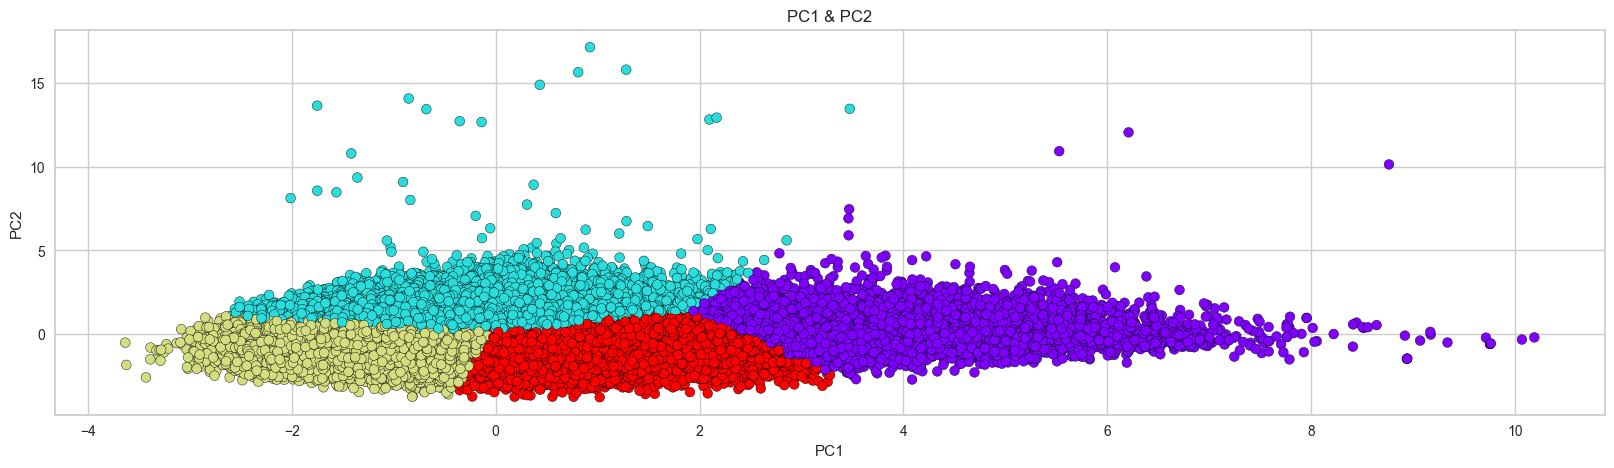

In [332]:
#VISUALIZACION GRAFICA DE LOS CLUSTERS 2
modelkmeans.fit(X)
cluster = modelkmeans.cluster_centers_
centroids = np.array(cluster)
labels = modelkmeans.labels_

plt.figure(figsize = (20,5))
plt.scatter(centroids[:,0],centroids[:,1], marker = "X", color = 'b')
plt.scatter(x = 'PC1', y = 'PC2', c = labels, cmap = 'rainbow', data = principal_df, edgecolor = 'black');
plt.title('PC1 & PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

***Una grafica scatter mas entedible y agradable visualmente.***

In [333]:
X = df_modelo2.iloc[::].values

In [334]:
from sklearn.metrics import davies_bouldin_score
labels = y_kmeans
davies_bouldin_score(X, labels)

0.5155856514514201

***SIN PCA, EL RESULTADO DE DEVIES BOULDIN SCORE ES DE 0.5155856514514201***

***Hasta ahora con estas graficas y resultado final, podemos ver que tenemos muchas superpociciones, por ende la cercania de algunos centroides es mucha. Vamos a testear el modelo para luego hacer los ajustes.***

In [283]:
df_modelo.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,73608.000000,7.360800e+04,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000
mean,34.435904,2.322584e+05,0.085602,0.558255,0.637040,5.281532,-8.613879,0.632812,0.090156,0.330422,0.184831,0.222951,0.466762,122.111245,3.895324,60.429328
std,19.079598,1.192594e+05,0.279778,0.178536,0.258557,3.558682,5.329260,0.482042,0.118615,0.339478,0.332046,0.201657,0.264258,30.150402,0.460756,33.227404
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738640e+05,0.000000,0.445000,0.458000,2.000000,-10.466000,0.000000,0.036200,0.016000,0.000000,0.098700,0.244000,99.134750,4.000000,33.000000
50%,34.000000,2.157410e+05,0.000000,0.573000,0.680000,5.000000,-7.271000,1.000000,0.049400,0.193000,0.000084,0.134000,0.454000,122.043000,4.000000,61.000000
75%,48.000000,2.687470e+05,0.000000,0.690000,0.858000,8.000000,-5.151000,1.000000,0.088400,0.629000,0.151000,0.288000,0.681000,140.135250,4.000000,91.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [284]:
df_modelo2.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
count,73608.000000,7.360800e+04,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000
mean,34.435904,2.322584e+05,0.085602,0.558255,0.637040,5.281532,-8.613879,0.632812,0.090156,0.330422,0.184831,0.222951,0.466762,122.111245,3.895324,60.429328
std,19.079598,1.192594e+05,0.279778,0.178536,0.258557,3.558682,5.329260,0.482042,0.118615,0.339478,0.332046,0.201657,0.264258,30.150402,0.460756,33.227404
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738640e+05,0.000000,0.445000,0.458000,2.000000,-10.466000,0.000000,0.036200,0.016000,0.000000,0.098700,0.244000,99.134750,4.000000,33.000000
50%,34.000000,2.157410e+05,0.000000,0.573000,0.680000,5.000000,-7.271000,1.000000,0.049400,0.193000,0.000084,0.134000,0.454000,122.043000,4.000000,61.000000
75%,48.000000,2.687470e+05,0.000000,0.690000,0.858000,8.000000,-5.151000,1.000000,0.088400,0.629000,0.151000,0.288000,0.681000,140.135250,4.000000,91.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000


In [285]:
principal_df.head(2)

,PC1,PC2
0,-21432.412482,-50.774305
1,-44125.412213,-57.726570


In [286]:
principal_df.shape

(73608, 2)

# Creacion del modelo definitivo

In [287]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=4, init='k-means++', n_init=10).fit(df_modelo2)

In [288]:
# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(df_modelo2)

In [289]:
# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [290]:
predictions_df['cluster'].unique()

array([0, 1, 3, 2])

In [291]:
predictions_df.shape

(73608, 1)

In [292]:
predictions_df.head(5)

,cluster
0,0
1,0
2,1
3,1
4,0


In [293]:
predictions_df = predictions_df.reset_index()

In [294]:
# Attach cluster predictions to original data frame
spotify_pred = df_modelo.copy()

In [295]:
spotify_pred.head(5)

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,To Begin Again,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,0
1,Hold On - Remix,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.1210,0.387,120.004,4,0
2,All I Want For Christmas Is A Real Good Tan,0,234186,0,0.593,0.455,6,-8.192,1,0.0388,0.366,0.000000,0.0914,0.564,202.019,4,0
3,The Haves,0,306794,0,0.474,0.519,7,-5.291,1,0.0253,0.281,0.000000,0.1070,0.326,151.832,4,0
4,So Far Away - Acoustic,52,171543,0,0.576,0.331,6,-9.389,0,0.0306,0.894,0.000034,0.1290,0.407,149.020,4,0


In [296]:
spotify_pred.shape

(73608, 17)

In [297]:
spotify_pred = spotify_pred.reset_index()

In [298]:
spotify_pred.head(2)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero
0,0,To Begin Again,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.210,0.000000,0.117,0.120,76.332,4,0
1,1,Hold On - Remix,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.124,0.000028,0.121,0.387,120.004,4,0


In [299]:
spotify_pred = pd.merge(spotify_pred, predictions_df)

In [300]:
spotify_pred['cluster'].unique()

array([0, 1, 3, 2])

In [301]:
spotify_pred[spotify_pred['popularity'] >= 70].sort_values(by='popularity', ascending= False)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
49236,49237,Unholy (feat. Kim Petras),100,156943,0,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,4,80,0
30482,30482,"Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,0,0.621,0.782,2,-5.548,1,0.0440,0.0125,0.033000,0.2300,0.550,128.033,4,51,0
54048,54049,La Bachata,98,162637,0,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,89,0
54042,54043,Tití Me Preguntó,97,243716,0,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4,89,0
54044,54045,Me Porto Bonito,97,178567,1,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,4,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54458,54459,KESI,70,177255,0,0.889,0.756,4,-4.230,1,0.0560,0.1320,0.000000,0.0996,0.918,122.905,4,89,0
37254,37254,grace,70,289541,0,0.668,0.685,7,-8.765,1,0.0472,0.0822,0.025700,0.3190,0.637,108.971,4,62,1
20878,20878,Stop The World I Wanna Get Off With You,70,191040,0,0.661,0.730,6,-6.779,0,0.0574,0.0537,0.000034,0.1400,0.530,95.027,4,38,0
32671,32671,Mehrama,70,249415,0,0.560,0.631,7,-9.032,1,0.0334,0.8610,0.013300,0.0985,0.376,107.987,4,55,1


## TEST DEL MODELO

In [302]:
#Borramos algunos duplicados [TAREA QUE TENDRIA QUE HABERCE REALIZADO ANTES]. Proxima correccion.
spotify_pred = spotify_pred.drop_duplicates(subset=['track_name'], keep='last')

In [303]:
spotify_pred[spotify_pred['track_name'] == 'Presión']

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
1635,1635,Presión,47,238346,0,0.414,0.938,10,-4.592,0,0.0684,0.0602,0.000001,0.11,0.643,99.014,4,3,1


In [304]:
cluster_num = spotify_pred[spotify_pred.track_name =='La Bachata'].cluster.item()

In [305]:
cluster_num

0

In [306]:
spotify_pred[spotify_pred.genero == 89]

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
53936,53937,AMOR DE MI VIDA,7,189613,0,0.735,0.674,6,-5.629,0,0.1240,0.1800,0.000000,0.108,0.561,171.883,4,89,1
53937,53938,JAMAICA,6,224240,0,0.520,0.542,1,-7.404,0,0.1550,0.0383,0.000000,0.371,0.669,81.131,4,89,0
53938,53939,TENGO FE,4,146426,0,0.757,0.571,7,-4.547,0,0.0906,0.2640,0.000009,0.313,0.538,159.933,4,89,0
53939,53940,SI TÚ SUPIERAS,6,196373,0,0.673,0.664,4,-5.382,0,0.1770,0.3760,0.000000,0.111,0.586,174.972,4,89,1
53940,53941,FRESH KERIAS,2,272800,0,0.741,0.582,8,-4.445,1,0.2810,0.2910,0.000101,0.152,0.713,186.096,4,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54481,54482,Amémonos a Escondidas,39,251226,0,0.761,0.909,10,-2.928,0,0.0704,0.1500,0.000000,0.215,0.555,99.999,4,89,1
54482,54483,"Soltero (feat. Mati, Fran C, Kevin Martes 13 &...",39,342517,1,0.502,0.601,0,-10.573,1,0.3100,0.0137,0.000000,0.197,0.527,139.819,5,89,1
54483,54484,Me Encantas,38,248189,0,0.809,0.656,4,-7.134,1,0.2460,0.0832,0.000000,0.100,0.819,171.924,4,89,1
54484,54485,Salimos a Cazarte - Remix,39,363573,1,0.748,0.692,11,-6.613,0,0.3700,0.2180,0.000000,0.209,0.622,170.097,4,89,1


In [307]:
spotify_pred[spotify_pred.cluster == cluster_num]

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
0,0,To Begin Again,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.1200,76.332,4,0,0
1,1,Hold On - Remix,56,188133,0,0.755,0.780,2,-6.084,1,0.0327,0.12400,0.000028,0.1210,0.3870,120.004,4,0,0
4,4,So Far Away - Acoustic,52,171543,0,0.576,0.331,6,-9.389,0,0.0306,0.89400,0.000034,0.1290,0.4070,149.020,4,0,0
6,6,Sleepwalking in the Rain,0,216000,0,0.501,0.381,0,-9.448,1,0.0360,0.68700,0.001330,0.1190,0.5020,80.075,4,0,0
7,7,What's Left of You,57,178600,1,0.731,0.507,0,-6.477,1,0.0460,0.57200,0.000000,0.0912,0.2650,117.969,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73575,73576,We Will Not Be Shaken - Live,46,332604,0,0.392,0.668,9,-7.342,1,0.0296,0.00356,0.000560,0.5880,0.1150,148.013,4,113,0
73577,73578,Ain’t No Grave - Live,47,493293,0,0.370,0.831,4,-4.484,1,0.0442,0.01290,0.000122,0.1090,0.1850,148.008,4,113,0
73579,73580,Ondas Cerebrales Delta,21,359003,0,0.312,0.033,9,-25.894,1,0.0307,0.85300,0.851000,0.1140,0.0639,79.655,4,113,0
73582,73583,Faithful,34,285120,0,0.618,0.419,6,-6.156,1,0.0279,0.30900,0.000000,0.1070,0.3730,131.973,4,113,0


In [308]:
spotify_pred.dtypes

index                 int64
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genero                int64
cluster               int32
dtype: object

In [309]:
spotify_pred.loc[(spotify_pred['genero'] == 89) & (spotify_pred['cluster'] == 0) & (spotify_pred['popularity'] >= 70)].head(10).sort_values(by='popularity', ascending=False)

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
54048,54049,La Bachata,98,162637,0,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,89,0
54042,54043,Tití Me Preguntó,97,243716,0,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,4,89,0
54044,54045,Me Porto Bonito,97,178567,1,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,4,89,0
54040,54041,Ojitos Lindos,94,258298,0,0.647,0.686,3,-5.745,0,0.0413,0.0800,0.000001,0.5280,0.268,79.928,4,89,0
54046,54047,PROVENZA,93,210200,0,0.870,0.516,1,-8.006,1,0.0541,0.6560,0.008230,0.1100,0.530,111.005,4,89,0
54047,54048,Gasolina,82,192600,0,0.852,0.797,0,-6.543,1,0.0614,0.3220,0.000003,0.0845,0.741,96.008,4,89,0
54049,54050,Con Calma,79,193226,0,0.737,0.860,8,-2.652,0,0.0593,0.1100,0.000002,0.0574,0.656,93.989,4,89,0
54004,54005,Shower,78,206166,0,0.699,0.529,2,-7.548,1,0.0487,0.0317,0.000036,0.2850,0.121,119.987,4,89,0
54043,54044,X,74,172854,0,0.594,0.749,9,-5.298,0,0.0560,0.0338,0.001060,0.3000,0.694,179.968,4,89,0
54037,54038,Hawái - Remix,72,200481,0,0.766,0.788,6,-3.128,0,0.3120,0.1050,0.000006,0.1420,0.609,179.984,4,89,0


FUNCION LISTA REPRODUCCION

In [361]:
def lista_reproduccion(cancion, spotify_pred):
    cluster_num = spotify_pred[spotify_pred.track_name == cancion].cluster.item()
    genero_num = spotify_pred[spotify_pred.track_name == cancion].genero.item()
    playlist = spotify_pred.loc[(spotify_pred['genero'] == genero_num) & (spotify_pred['cluster'] == cluster_num) & (spotify_pred['popularity'] > 60)].head(10).sort_values(by= 'popularity', ascending=False)
    return playlist

In [362]:
cancion = 'In Da Club'

In [363]:
playlist = lista_reproduccion(cancion, spotify_pred)

In [364]:
#PISTA "IN DA CLUB"
playlist

,index,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genero,cluster
30179,30179,Baller,82,148188,0,0.711,0.702,5,-10.048,1,0.2330,0.00487,0.016300,0.0932,0.674,180.219,4,51,0
30181,30181,We Rollin,79,199205,1,0.820,0.504,4,-9.113,0,0.1410,0.26100,0.000007,0.1040,0.275,85.016,4,51,0
30180,30180,Elevated,76,200658,1,0.828,0.533,6,-5.779,0,0.0910,0.21400,0.000028,0.3070,0.605,93.021,4,51,0
30182,30182,Cold Hours,74,206117,0,0.737,0.613,1,-7.304,0,0.3580,0.31600,0.000001,0.3430,0.493,170.140,4,51,0
30187,30187,"Dippam Dappam (From ""Kaathuvaakula Rendu Kaadh...",74,209032,0,0.827,0.717,11,-7.755,0,0.1110,0.09080,0.000523,0.0511,0.772,123.987,4,51,0
30190,30190,"Pathala Pathala (From ""Vikram"")",74,211384,0,0.826,0.779,0,-5.609,1,0.3750,0.35000,0.000000,0.0657,0.936,130.091,4,51,0
30186,30186,Lokiverse - Background Score,73,156330,0,0.640,0.860,7,-4.481,1,0.1010,0.30200,0.468000,0.1090,0.516,96.996,4,51,0
30184,30184,Rolex Theme - Background Score,72,53247,0,0.610,0.925,8,-4.010,1,0.1140,0.00804,0.767000,0.1310,0.442,101.992,4,51,0
30188,30188,Once Upon a Time,72,143709,0,0.646,0.879,1,-3.668,1,0.0823,0.00659,0.060700,0.1170,0.429,123.849,4,51,0
30189,30189,"Private Party (From ""Don"")",71,216774,0,0.862,0.886,10,-5.423,0,0.1230,0.18400,0.000001,0.0565,0.896,124.031,4,51,0


***En este primer ajuste, podemos ver que el score de la distancia entre centroides ha mejorado notablemente, queda observar si la recomendacion que podemos obtener gracias al modelo y la funcion tiene algun tipo de sentido, por ultimo queda agregar que falta un tercer ajuste sobre algunas variables que quizas no tienen relevancia para este modelo.***